_______________

# Background : Youth Opportunity Modelling

________________

The youth measure of opportunity may be modelled using the employment , for out case it would be a very simple
model which considers any type of employment both formal and informal. Different aspect determine youth opportunity
which is the Education , employment , social (background) and mass movement in and out of a region.

In our quest to determine youth opportunity, we will first investigate regression methods on the relationship
between various varaible against with employment. This report will detail the following:
    
1. Determine opportunity statuses from our data.

    __
    1.1 Education status
    __
    
    __
    1.2 Employment status
    __
    
    __
    1.3 Social status
    __

    __
    1.4 Immigration and migration status
    __
    
2.  Choose input and output variables that may have a relationship and investigate it. 
    
3. Determine opportunity varaiables using:
    
    3.1 Linear regression - determine linear relationship of our variable against employment
    3.2 Multiple regression using:
        3.2.1 Generalised linear models
        
    2.3 Gaussian Processes - to determine the non - linear relationship of variables
    
4. Decision tree -  given the variables with a observed relationship which can be modelled and based on the which 
variables describe youth per municipality what is their opportunity.
    

 _____________________________


_______________________________

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import warnings
warnings.warn("deprecated", DeprecationWarning)
warnings.simplefilter("ignore")
%matplotlib inline

/home/dside/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/dside/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: deprecated
  if __name__ == '__main__':


# Education status
_________________

In [2]:
# # Education level by gender
df_educationlevel = pd.read_csv('Youth/YOUTH_AGE_20_TO_24_EDUCATION_LEVEL_South_Africa.csv')
# Education Attentrnce level by age group
df_attenlevel = pd.read_csv('Youth/YOUTH_EDUCATION_ATTENDANCE_AGE_INCOMPLETED_YEARS_GENDER_South_Africa.csv')

# Employement status
____________________

In [3]:
# Adults employed at home
df_adultempl_home = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_HOUSEHOLD_EMPLOYMENT_South_Africa.csv',\
                               )
# Youth current activities by gender
df_empl = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_EMPLOYMENT_EDUCATION_TRAINING_GENDER_South_Africa.csv',\
                                )
# Youth employment status by gender
df_empl_labour = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_LABOUR_FORCE_OFFICIAL_AGE_GROUP_GENDER_South_Africa.csv',\
                                )

# Social status

________________

In [4]:
# Poverty by youth age group
df_poverty = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_INCOME_POVERTY_AGE_GROUP_South_Africa.csv',\
                               )
# youth  with/without guardians
df_livingparent = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_LIVING_WITH_PARENTS_GENDER_South_Africa.csv',\
                               )

# youth  in multi-poverty by age gruop
df_povery_multi = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_INCOME_POVERTY_AGE_GROUP_South_Africa.csv',\
                               )

# youth  in multi-dimensional poverty by race
df_provery_multirace = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_MULTIDIMENSIONALLY_POOR_GENDER_POPULATION_GROUP_South_Africa.csv',\
                               )

# Immigration and Migration status
______________

In [5]:
# Youth birth place within the South Africa
df_birth_prov = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_PROVINCE_OF_BIRTH_South_Africa.csv',\
                           )
# Citizenship
df_birth = pd.read_csv('/home/dside/Documents/Csir_project/Youth/YOUTH_REGION_OF_BIRTH_South_Africa.csv',\
                      )

In [6]:
df_birth.shape

(279, 10)

In [7]:
# Remove the population pf the whole country:ZA
df_empl = df_empl[df_empl.geo_code != 'ZA']
df_birth_prov = df_birth_prov[df_birth_prov.geo_code != 'ZA']
df_birth = df_birth[df_birth.geo_code != 'ZA']
df_empl_labour = df_empl_labour[df_empl_labour.geo_code != 'ZA']
df_adultempl_home = df_adultempl_home[df_adultempl_home.geo_code != 'ZA']
df_birth_prov = df_birth_prov[df_birth_prov.geo_code != 'ZA']
df_educationlevel = df_educationlevel[df_educationlevel.geo_code != 'ZA']
df_attenlevel = df_attenlevel[df_attenlevel.geo_code != 'ZA']
df_poverty = df_poverty[df_poverty.geo_code != 'ZA']
df_livingparent = df_livingparent[df_livingparent.geo_code != 'ZA']
df_provery_multirace = df_provery_multirace[df_provery_multirace.geo_code != 'ZA']

___
# Normalize Data
___

In [8]:
def normalize_data(x):
    """
    normalizes the input data x 
    """

    x1 = x.iloc[:, :4]
    x2 = x.iloc[:,5:].div(x.total, axis=0)
    x3 = pd.concat([x1,x2],axis=1)
    return x3


In [9]:
# Normalize the data

Youthpoorrace = normalize_data(df_provery_multirace)
YouthMigration = normalize_data(df_birth)
Youthliving_parents = normalize_data(df_livingparent)
Employemnt_data    = normalize_data(df_empl_labour)   
EmployedAdults_data = normalize_data(df_adultempl_home)
Educationlevel_data = normalize_data(df_educationlevel)
Poverty_data        = normalize_data(df_poverty)
EmployedYouth        = normalize_data(df_empl)
Employemnt_data    = normalize_data(df_empl_labour)

In [10]:
print ("Education:", Educationlevel_data.columns)
print(" ")
print ("Adult employed:", EmployedAdults_data.columns)
print(" ")
print ("Education level:", Educationlevel_data.columns)
print(" ")
print ("Poverty:" ,Poverty_data.columns)
print(" ")
print ("Employed youth:", EmployedYouth.columns)

('Education:', Index([u'geo_level', u'geo_code', u'geoid', u'name', u'Any tertiary',
       u'Any tertiary-Female', u'Any tertiary-Male', u'Grade 10/11',
       u'Grade 10/11-Female', u'Grade 10/11-Male', u'Grade 9',
       u'Grade 9-Female', u'Grade 9-Male', u'Less than Grade9',
       u'Less than Grade9-Female', u'Less than Grade9-Male',
       u'Matric/matric equivalent', u'Matric/matric equivalent-Female',
       u'Matric/matric equivalent-Male'],
      dtype='object'))
 
('Adult employed:', Index([u'geo_level', u'geo_code', u'geoid', u'name',
       u'At least one employed adult', u'No employed adult'],
      dtype='object'))
 
('Education level:', Index([u'geo_level', u'geo_code', u'geoid', u'name', u'Any tertiary',
       u'Any tertiary-Female', u'Any tertiary-Male', u'Grade 10/11',
       u'Grade 10/11-Female', u'Grade 10/11-Male', u'Grade 9',
       u'Grade 9-Female', u'Grade 9-Male', u'Less than Grade9',
       u'Less than Grade9-Female', u'Less than Grade9-Male',
       u'Ma

In [11]:
print Employemnt_data.shape
print EmployedAdults_data.shape
print Educationlevel_data.shape
print Poverty_data.shape
print Youthpoorrace.shape
print YouthMigration.shape
print Youthliving_parents.shape 
print Poverty_data.shape       
print EmployedYouth.shape      


(278, 18)
(278, 6)
(278, 19)
(278, 20)
(278, 30)
(278, 9)
(278, 16)
(278, 20)
(278, 14)


___________________

# Job opporturnity measure 
______________________

In [12]:
# Predicting variables

Data = pd.DataFrame()

Data[['Multidimensionally_poverty']]= Youthpoorrace[['Multidimensionally poor']]

Data[['Other','Rest of Africa', 'SADC', 'South Africa', 'Unspecified']]= YouthMigration[['Other',
       'Rest of Africa', 'SADC', 'South Africa', 'Unspecified']]


Data[['Both parents', 'Father only','Mother only','Living_With_Neither_parent']]= Youthliving_parents[['Both parents',
                                                        'Father only',
                                                       'Mother only',
                                                       'Neither parent']]

Data[['Atleast_one_employed_adult_at_home',
               'No_employed_adult_at_home']]= EmployedAdults_data[['At least one employed adult','No employed adult']]

    
Data[['Youth_finished_school','Youth_doingnothing']]= EmployedYouth[['NEET',
                                    'School/post-school']]

Data[['Youth_poverty_15_24','Youth_poverty_25_34','Non-poor-25-34',
'Non-poor-15-24']] = Poverty_data[['Income-poor-15-24',
                                     'Income-poor-25-34',
                                     'Non-poor-25-34',
                                     'Non-poor-15-24']]
Data[['Any tertiary','Matric/matric_equivalent','Grade 10/11']]= Educationlevel_data[['Any tertiary',
                                                            'Matric/matric equivalent','Grade 10/11']]

Data['Employmentegnder'] = EmployedYouth['Employed']

# Predicted variable

Data['Employable_youth']    = Employemnt_data['employed']

In [13]:
EmployedYouth

,geo_level,geo_code,geoid,name,Employed,Employed-Female,Employed-Male,NEET,NEET-Female,NEET-Male,School/post-school,School/post-school-employment education training,School/post-school-Female,School/post-school-Male
1,municipality,WC044,municipality-WC044,George,0.271692,0.122828,0.148865,0.351928,0.195040,0.156888,0.376380,0.0,0.191583,0.184796
2,municipality,WC047,municipality-WC047,Bitou,0.246790,0.101906,0.144884,0.411407,0.228409,0.182998,0.341803,0.0,0.175294,0.166509
3,municipality,WC048,municipality-WC048,Knysna,0.257588,0.110992,0.146595,0.364300,0.206518,0.157782,0.378113,0.0,0.192802,0.185311
4,municipality,WC051,municipality-WC051,Laingsburg,0.380829,0.147668,0.233161,0.332470,0.210708,0.121762,0.286701,0.0,0.136442,0.150259
5,municipality,WC052,municipality-WC052,Prince Albert,0.251707,0.076923,0.174784,0.455621,0.271734,0.183887,0.292672,0.0,0.142467,0.150205
6,municipality,WC053,municipality-WC053,Beaufort West,0.201176,0.082691,0.118485,0.384455,0.212149,0.172306,0.414370,0.0,0.203396,0.210973
7,municipality,MP303,municipality-MP303,Mkhondo,0.131730,0.052583,0.079146,0.336771,0.197849,0.138922,0.531499,0.0,0.258337,0.273162
8,municipality,MP311,municipality-MP311,Victor Khanye,0.219492,0.072431,0.147061,0.356542,0.205992,0.150550,0.423967,0.0,0.202351,0.221615
9,municipality,MP322,municipality-MP322,Mbombela,0.161957,0.069507,0.092450,0.319730,0.186259,0.133471,0.518312,0.0,0.257944,0.260368
10,municipality,NW373,municipality-NW373,Rustenburg,0.245540,0.081027,0.164513,0.383908,0.217729,0.166179,0.370552,0.0,0.181015,0.189538


In [14]:
# PCA choosen features
dfnew = Data[['Atleast_one_employed_adult_at_home',
            'No_employed_adult_at_home',
              'Youth_doingnothing',
             'Multidimensionally_poverty',
              'Living_With_Neither_parent',
              'Matric/matric_equivalent',
              'Employable_youth']]
dfnew.shape

(278, 7)

_________
### Regression Methods
_______

#### Simple Linear Regression (LR)

In [15]:
from sklearn import datasets, linear_model
from sklearn import model_selection

In [16]:
def loaddata(data):
    
    df_new1 = data[data['Employable_youth'] >= 0.7]
    df_new2 = data[data['Employable_youth'] >= 0.4][data['Employable_youth'] < 0.7]
    df_new3 = data[data['Employable_youth'] < 0.4]
    
    print('Number of youth employed above 0.7: ' ,data[data['Employable_youth'] >= 0.7].shape)
    print('Number of youth employed between 0.4-0.7: ',data[data['Employable_youth'] >= 0.4][data['Employable_youth'] < 0.7].shape)
    print('Number of youth employed below 0.4: ',data[data['Employable_youth'] < 0.4].shape)
    
    
    frame_1_train = df_new1.sample(n = int(df_new1.shape[0]*0.80))
    frame_2_train = df_new2.sample(n = int(df_new2.shape[0]*0.80))
    frame_3_train = df_new3.sample(n = int(df_new3.shape[0]*0.80))
    df_train = pd.concat([frame_1_train, frame_2_train, frame_3_train])
    df_test = data[~data.index.isin(df_train.index)]
    
   
    return (df_train,df_test)

def Linear_regression(X_train,X_test,Y_train, Y_test):
    
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X_test, Y_test))
    
    Prediction = regr.predict(X_test)
    #print('predicted: %.3f  original: %.3f' % (np.mean(Prediction),np.mean(X_test)))
    
    # The mean squared error
    mse = np.mean((Prediction - Y_test) ** 2)
    
    
    msg = 'MSE: {:.6f}'.format(mse)
    print(msg)
    
    return  mse, Y_test, predictions
    
def Regreplot(x,y, y_pre, xtitle,ytitle):
    title = xtitle + ' ' + 'vs' + ' ' + ytitle
    fig, ax = plt.subplots(figsize=(15,8))
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

    plt.rc('font', **font)
    ax.scatter(x, y, color='black',alpha=0.5)
    ax.plot(x, y_pre, color='blue', linewidth=3)
    ax.legend(['Predcited','Data'])
    ax.set_xlabel(xtitle)
    ax.set_ylabel(ytitle)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    fig.suptitle(title,fontsize=15)
    plt.pause(0.1)
    plt.show()

In [17]:
# # # normalize the data with total samples
# data = dfnew
# # # load and split the data in training and testing
# X_train, X_test, Y_train, Y_test = loaddata(data)
# mse = []

# e, o, p = Linear_regression(X_train[:], X_train[:], X_test, Y_test)
# mse.append(e)


_____

# Gaussian Processes Model 

Modelling the non-linear relationship
_____

In [18]:
# import numpy as np
# from matplotlib import pyplot as plt
# from sklearn.gaussian_process import GaussianProcess
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, ExpSineSquared


# def Gaussian_processes(X, y):
#     """
#     Gaussian 
#     """

#     #Splitting the dataset
#     X = np.array(X)
    
#     X = np.atleast_2d(X).T
#     y = (np.array(y)).T
#     #Reshaping X
#     X = X.reshape(-1,1)
    
#     # Mesh the input space for evaluations of the real function, the prediction and
#     # its MSE
#     l = X.shape[0]
#     x = np.atleast_2d(np.linspace(X.min(),X.max(),10000)).T

    
#     # Instanciation of a Gaussian Process model with the relevant parameters 
#     kernel = C(1, (.01, .09)) * RBF(0.02, (0.01, .009)) 
#     #kernel  =  RBF(0.4, (.01, 1))

#     gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

#     # Fitting to data using Maximum Likelihood Estimation of the parameters
#     gp.fit(X, y)
    

#     # Predictions on the meshed x values and asking for MSE 
#     y_pred, sigma = gp.predict(x, return_std=True)
    
# #     # The mean squared error
# #     mse = np.mean((y_pred - y) ** 2)
# #     msg = 'MSE: {:.6f}'.format(mse)
# #     print(msg)
    
#     return y_pred, sigma, x
# # data 
# # normalize the data with total samples
# datax, datay = Inputfeatures,Outputfeature
# # data
# dataX, dataY =  datax.loc[:,'Atleast_one_employed_adult'], Outputfeature.loc[:,'Employment'] 
# print dataX.shape
# print dataY.shape
# y_pred, sigma, x  = Gaussian_processes(dataX, dataY)

# # Function plot showing prediciton and the 95 % confidence interval derived from the MSE
# fig = plt.figure(figsize=(15,10))
# plt.plot(dataX, dataY, 'r.', markersize=10, label=u'Observations')
# plt.plot(x, y_pred, 'b-', label=u'Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='g', ec='None', label='95% confidence interval')
# plt.xlabel('At least one employed adult')
# plt.ylabel('Number of adult employed at home vs Number of youth Completed Matric')
# plt.title('Number of adult employed at home and Number of youth Completed Matric')
# plt.legend(loc='upper left')
# plt.show()    

In [19]:
# from scipy import interpolate
# olddata = dataX
# x1 = np.linspace(0,1,olddata.shape[0] )
# print olddata.shape[0] 
# #Extrapolation function 
# f1 = interpolate.interp1d(x1, olddata, fill_value = "extrapolate")  

# #generating new x input values in the range of 1 to 10
# newData=[]
# for i in range(1,10):
#     newData.append(f1(i-10))
# newData=np.array(newData)


# newData=[newData]

# newData=np.transpose(newData)

# print ("Extrapolated values",newData)


# y1=f1(newData).ravel()

# print("New Generated outputs =", y1)
# print("Graph for Extrapolated data")



# dataX, dataY =  datax.loc[:10,'At least one employed adult'], datay.loc[:10,'Matric '] 
# print dataX.shape
# print dataY.shape
# y_pred, sigma, x  = Gaussian_processes(newData, y1)



# fig1 = plt.figure(figsize=(10,8))

# plt.plot(newData, y1, 'r.', markersize=10, label=u'Observations')
# plt.plot(x, y_pred, 'b-', label=u'Prediction')
# plt.fill(np.concatenate([x, x[::-1]]),
#          np.concatenate([y_pred - 1.9600 * sigma,
#                         (y_pred + 1.9600 * sigma)[::-1]]),
#          alpha=.5, fc='b', ec='None', label='95% confidence interval')
# plt.xlabel('At least one employed adult')
# plt.ylabel('Number of adult employed at home vs Number of youth Completed Matric')
# plt.title('Number of adult employed at home and Number of youth Completed Matric')
# plt.show()


____

# Decision Tree And Random Forest
_____

In [20]:
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold
from sklearn.externals.six import StringIO  
from IPython.display import Image  

import pydotplus
import collections

/home/dside/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
def Decision_tree(X_train, Y_train, X_test, Y_test):
    """
    Fit regression tree
    """
  
    tree_classifier = tree.DecisionTreeRegressor(criterion = "mse",splitter= 'random',
    max_depth=4, random_state=0, min_samples_split=25)
   
   
    decision_trained_model = tree_classifier.fit(X_train, Y_train)
    predictions = decision_trained_model.predict(X_test)

   
    mse = np.mean(((predictions - Y_test))**2)
    # The mean squared error
    Accurary = 1 -mse
    #print("Accuracy: %.2f"% Accurary)


    return mse, Y_test, predictions , decision_trained_model


In [22]:
data = dfnew
df_train,df_test = loaddata(data)
x_train = df_train.iloc[:,0:-1].as_matrix()
y_train = df_train.iloc[:, -1:].as_matrix()
x_test = df_test.iloc[:,0:-1].as_matrix()
y_test = df_test.iloc[:, -1:].as_matrix()

('Number of youth employed above 0.7: ', (23, 7))
('Number of youth employed between 0.4-0.7: ', (165, 7))
('Number of youth employed below 0.4: ', (90, 7))


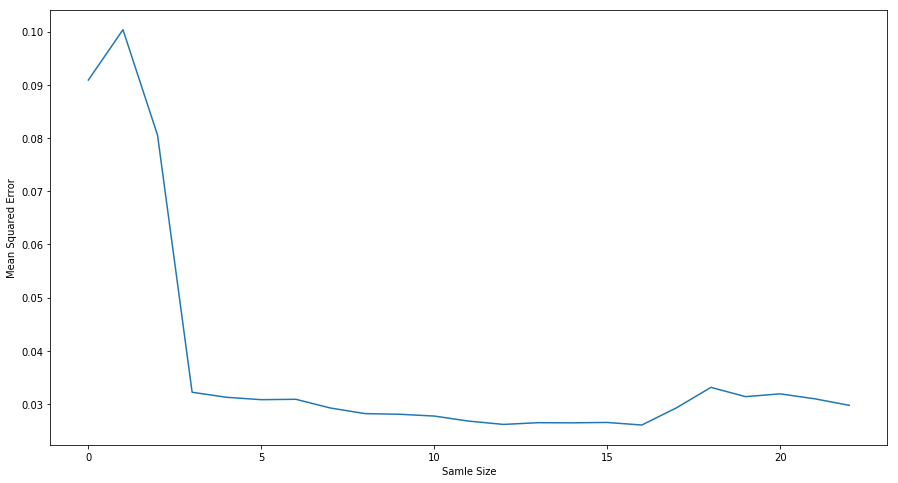

In [23]:
mse = []
for i in range(1, x_train.shape[0], 10):
    e, o, p , decision_trained_model= Decision_tree(x_train[:i], y_train[:i], x_test, y_test)
    mse.append(e)
plt.figure(figsize=(15,8))
plt.xlabel('Samle Size')
plt.ylabel('Mean Squared Error')
plt.plot(mse)
plt.show()

In [24]:
for ori, pre in zip(o.tolist(), p.tolist()):
    print("(predic,original) : (" + str(pre) + ", " + str(ori[0])+")")

(predic,original) : (0.495271461212, 0.52255721831)
(predic,original) : (0.737389395219, 0.72417707151)
(predic,original) : (0.589068763695, 0.479177377892)
(predic,original) : (0.589068763695, 0.500425531915)
(predic,original) : (0.346801800058, 0.376500315856)
(predic,original) : (0.589068763695, 0.63407079646)
(predic,original) : (0.440434533859, 0.375545851528)
(predic,original) : (0.440434533859, 0.42432)
(predic,original) : (0.440434533859, 0.45151430953)
(predic,original) : (0.440434533859, 0.421834181218)
(predic,original) : (0.495271461212, 0.398021981988)
(predic,original) : (0.495271461212, 0.556205599666)
(predic,original) : (0.296957250291, 0.362239297475)
(predic,original) : (0.296957250291, 0.252193819153)
(predic,original) : (0.374675128818, 0.347767253045)
(predic,original) : (0.374675128818, 0.507437070938)
(predic,original) : (0.374675128818, 0.454112221368)
(predic,original) : (0.374675128818, 0.437058361685)
(predic,original) : (0.374675128818, 0.353660498793)
(pre

In [25]:
from sklearn.ensemble import RandomForestRegressor
def Random_forest(X_train, Y_train, X_test, Y_test):
    """
    Fit random forest
    """
  
    
    rf = RandomForestRegressor()
    forest_trained_model = rf.fit(X_train, Y_train)
    
    predictions = forest_trained_model.predict(X_test)
   
    mse = np.mean( ((predictions - Y_test))**2)
    # The mean squared error
    Accurary = 1 -mse
    #print("Accuracy: %.2f"% Accurary)



    return mse, Y_test, predictions, forest_trained_model

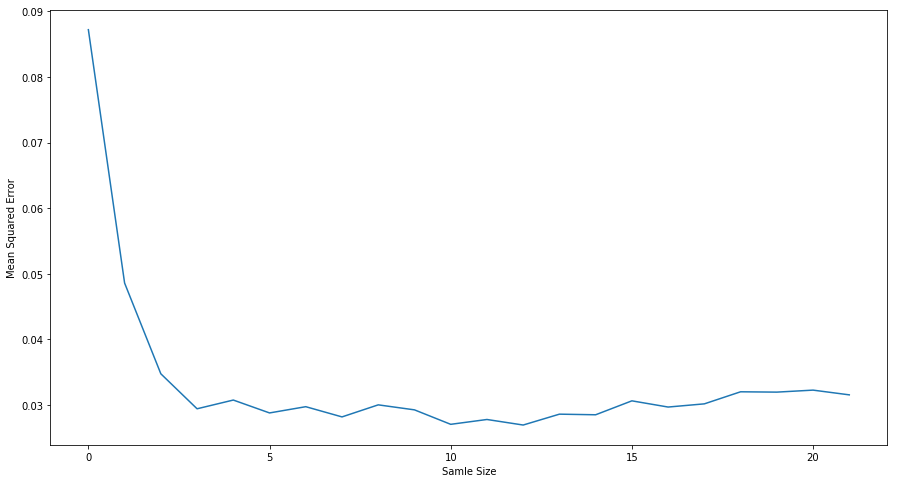

In [26]:
mser = []
predi = []
for i in range(10, x_train.shape[0], 10):
    re, ro, rp, forest_trained_model= Random_forest(x_train[:i], y_train[:i], x_test, y_test)
    mser.append(re)
    predi.append(re)
plt.figure(figsize=(15,8))
plt.xlabel('Samle Size')
plt.ylabel('Mean Squared Error')
plt.plot(mser)
plt.show()    

In [27]:
for ori, pre in zip(ro.tolist(), rp.tolist()):
    print("(predic,original) : (" + str(pre) + ", " + str(ori[0])+")")

(predic,original) : (0.497834880978, 0.52255721831)
(predic,original) : (0.752754546784, 0.72417707151)
(predic,original) : (0.487066626426, 0.479177377892)
(predic,original) : (0.5878139055, 0.500425531915)
(predic,original) : (0.391985682736, 0.376500315856)
(predic,original) : (0.551895096045, 0.63407079646)
(predic,original) : (0.453021951218, 0.375545851528)
(predic,original) : (0.497616903563, 0.42432)
(predic,original) : (0.467861988155, 0.45151430953)
(predic,original) : (0.433934519136, 0.421834181218)
(predic,original) : (0.462455593639, 0.398021981988)
(predic,original) : (0.579139946838, 0.556205599666)
(predic,original) : (0.38280503594, 0.362239297475)
(predic,original) : (0.337667108203, 0.252193819153)
(predic,original) : (0.379010433803, 0.347767253045)
(predic,original) : (0.441602286013, 0.507437070938)
(predic,original) : (0.430095262485, 0.454112221368)
(predic,original) : (0.342080954035, 0.437058361685)
(predic,original) : (0.354926364672, 0.353660498793)
(predic

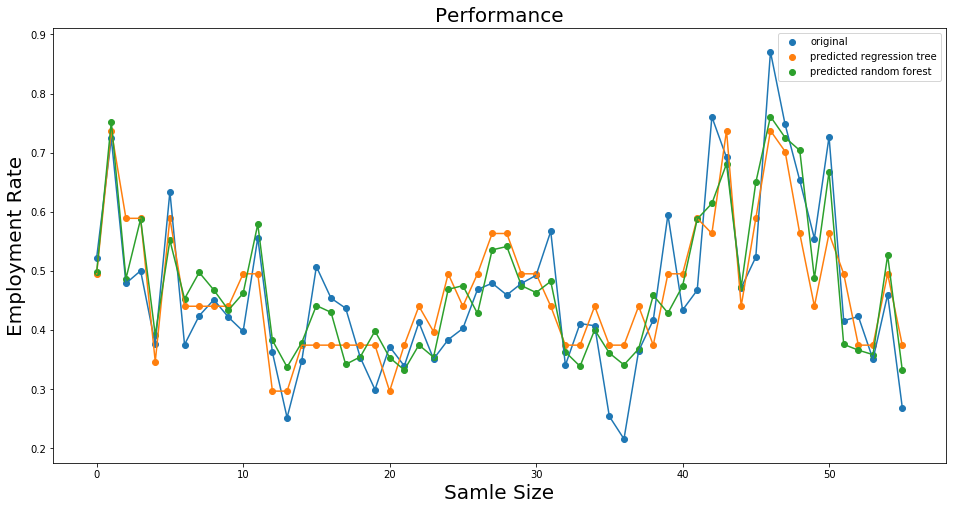

In [39]:
x=range(0,len(o))
fig = plt.figure(figsize=(16,8))
plt.scatter(x, o, label = 'original')
plt.scatter(x, p, label = 'predicted regression tree')
plt.scatter(x, rp, label = 'predicted random forest')
plt.plot(o)
plt.plot(p)
plt.plot(rp)
plt.title("Performance",fontsize=20)
plt.xlabel('Samle Size',fontsize=20)
plt.ylabel('Employment Rate',fontsize=20)
plt.legend()
plt.show()
fig.savefig('/home/dside/Documents/Csir_project//perfomance.jpg',dpi=100)

 ___
    
# save models

____

In [29]:
import os
import pickle
 
Decisiontree = open('/home/dside/Documents/Csir_project/models/Decision_tree.pkl', 'wb')

pickle.dump(decision_trained_model, Decisiontree)
Decisiontree.close()

Random_forest = open('/home/dside/Documents/Csir_project/models/forest.pkl', 'wb')

pickle.dump(forest_trained_model, Random_forest)
Random_forest.close()

In [30]:
# load the model from disk
loaded_model_Random = pickle.load(open('/home/dside/Documents/Csir_project/models/forest.pkl','rb'))


loaded_model_Decisiontree = pickle.load(open('/home/dside/Documents/Csir_project/models/Decision_tree.pkl','rb'))

In [31]:
X = np.atleast_2d(dfnew.iloc[:,0:-1].values)

In [32]:
result = loaded_model_Random.predict(np.atleast_2d(X))
pd.DataFrame(result)

,0
0,0.587149
1,0.478139
2,0.546842
3,0.759101
4,0.657737
5,0.527957
6,0.444203
7,0.521899
8,0.460344
9,0.522976


In [33]:
dataprediction = df_adultempl_home[['geo_code','geoid','name']]
dataprediction['Opportunity_prediction'] = result 

In [34]:
dataprediction.to_csv("/home/dside/Documents/Csir_project/Final/Opportunity_meaure.csv",index=False)

In [35]:
result = loaded_model_Decisiontree.predict(np.atleast_2d(X))

In [36]:
feature_names = dfnew.iloc[:,0:-1].columns
feature_names

Index([u'Atleast_one_employed_adult_at_home', u'No_employed_adult_at_home',
       u'Youth_doingnothing', u'Multidimensionally_poverty',
       u'Living_With_Neither_parent', u'Matric/matric_equivalent'],
      dtype='object')

In [37]:
# visualize tree
from sklearn.tree import export_graphviz

def visualize_tree(method, feature_names):
    
    dot_data = tree.export_graphviz(method,
                
                                out_file=None,
                                filled=True,
                                rounded=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('turquoise','orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))
    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    graph.write_png('tree.png')
Image(graph.create_png())

NameError: name 'graph' is not defined

In [ ]:
visualize_tree(loaded_model_Decisiontree, feature_names)

In [ ]:
dataprediction